In [2]:
# Import the necessary packages below

import pandas as pd
import numpy as np
import requests
import string
import re
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
from bs4 import BeautifulSoup
%matplotlib inline

## Q1: Apply PCA to user-movie ratings

(a) Read in the data and transform data frames.

i. Import the data from the csv file 'ratings.csv' into a pandas data frame. Each row corresponds to the rating given by a user to a particular movie. There is a header row that specifies the fields: userId, movieId, rating, timestamp. Transform the data into a movie-user ratings matrix such that rows refer to movies, columns refer to users, and each cell contains the rating for the associated movie/user pair. Assign a value of 0 for any missing values. (Note: For this operation, you can use the pivot_table() function in pandas with index as movie ids, columns as user ids, values as rating.)

ii. Import the data from the csv file 'movies.csv' into a pandas data frame. Each row corresponds to title and genre information for a particular movie. There is a header row that specifies the fields: movieId, title, genre. Each movie is associated with a list of genres, separated by '|'. Create a new column called 'firstGenre' that contains only the first genre from the list. You can do this easily with str.split().  Drop the original 'genre' column.

iii. Return the data frames from (i) and (ii).

In [3]:
# construct_data(ratingsFilename, genreFilename) takes as input the filenames to read 
# in data from (as specified above), converts the ratings data into a movie-user 
# dataframe df_A, and converts the movie data into a data frame df_B that includes a 
# 'firstGenre' column.
# You will use these dataframes in subsequent questions. 



def construct_data(ratingsFilename, genreFilename):

    # Read ratings and create pivot table
    ratings = pd.read_csv(ratingsFilename)
    df_A = ratings.pivot_table(index='movieId', columns='userId', values='rating', fill_value=0)

    # Read movies and process genres
    movies = pd.read_csv(genreFilename)
    movies['firstGenre'] = movies['genres'].str.split('|').str[0]
    df_B = movies.drop(columns=['genres'])

    return df_A, df_B


# Example: 
construct_data('ratings.csv', 'movies.csv') # -> (df_A 9724x610, df_B 9742x3)

(userId   1    2    3    4    5    6    7    8    9    10  ...   601  602  603  \
 movieId                                                   ...                   
 1          4  0.0  0.0    0    4    0  4.5    0    0  0.0 ...   4.0    0    4   
 2          0  0.0  0.0    0    0    4  0.0    4    0  0.0 ...   0.0    4    0   
 3          4  0.0  0.0    0    0    5  0.0    0    0  0.0 ...   0.0    0    0   
 4          0  0.0  0.0    0    0    3  0.0    0    0  0.0 ...   0.0    0    0   
 5          0  0.0  0.0    0    0    5  0.0    0    0  0.0 ...   0.0    0    0   
 6          4  0.0  0.0    0    0    4  0.0    0    0  0.0 ...   0.0    3    4   
 7          0  0.0  0.0    0    0    4  0.0    0    0  0.0 ...   0.0    0    0   
 8          0  0.0  0.0    0    0    3  0.0    0    0  0.0 ...   0.0    0    0   
 9          0  0.0  0.0    0    0    0  0.0    0    0  0.0 ...   0.0    0    0   
 10         0  0.0  0.0    0    0    3  0.0    2    0  0.0 ...   0.0    3    0   
 11         0  0

In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(b) Apply PCA to the movie-user matrix A with a specified number of components k. Return the resulting explained variance ratio vector and the transformed data (converted back to a pandas dataframe). 

In [6]:
# apply_pca(df, k) takes as input a movie-user ratings dataframe and target number 
# of pca components k. The function should first mean center the data in the data 
# frame, them perform PCA with k components and transform the data. Return the pca
# attribute explained_variance_ratio_ that records the explained variance for each 
# of the k components, and the transformed data (in a new data frame).


def apply_pca(df, k):
   
    # Mean center the data
    df_centered = df - df.mean(axis=0)

    # Apply PCA
    pca = decomposition.PCA(n_components=k)
    transformed_data = pca.fit_transform(df_centered)

    # Return explained variance ratio and transformed data as DataFrame
    transformed_df = pd.DataFrame(transformed_data, index=df.index)

    return pca.explained_variance_ratio_, transformed_df
    
    
df_A, df_B = construct_data('ratings.csv', 'movies.csv')
apply_pca(df_A, 2)  # -> (array([0.1762..., 0.0418...]), transformed_df 9724x2)

(array([0.17620942, 0.04189505]),                  0          1
 movieId                      
 1        36.086289  -6.567051
 2        18.250960  -0.545759
 3         5.901016  -5.712350
 4        -1.980883  -0.808690
 5         3.558845  -2.674387
 6        19.196081  -7.035174
 7         3.900148  -5.611252
 8        -1.034501  -0.565252
 9        -1.405491  -1.145111
 10       19.691371  -7.744588
 11        9.352151 -10.578377
 12       -0.080004  -0.051721
 13       -1.183441  -0.716085
 14       -0.447344  -3.181692
 15       -0.730494  -1.768023
 16       16.389912  -1.734819
 17        8.516639  -8.816116
 18        2.849232   0.002951
 19       11.288088   0.187946
 20        0.082542   0.721765
 21       12.378964 -14.346183
 22        3.379660  -4.560071
 23        0.595862  -1.010300
 24        2.591786  -2.642707
 25        8.233931  -9.186957
 26        0.355436  -1.861028
 27       -1.118838  -0.807548
 28        0.063528  -1.966834
 29        6.300092  -5.755826
 30   

In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(c) Join the data frames from Q1a (movie title and firstGenre) and Q1b (movies with dimensionality reduced by pca). The result should be a data frame with rows corresponding to movies, the first k columns should be the lower dimensional representation of user rating from pca, then the last three columns should be movieId, movie title, and firstGenre. Return the resulting data frame.


In [10]:
# join_movieDataFrames(pcaDF, genreDF) takes two data frames as input: (1) movies 
# after dimensionalilty reduction with pca, and (2) movies with title and first genre.
# The two data frames should be joined together, using movieId as a key, and returned 
# as a single data frame.

def join_movieDataFrames(pcaDF, genreDF):

    # Reset index to bring movieId back as a column
    pcaDF = pcaDF.reset_index()

    # Merge on 'movieId'
    joined_df = pd.merge(pcaDF, genreDF, on='movieId')

    return joined_df

(df_A, df_B) = construct_data('ratings.csv', 'movies.csv')
(exVar, df_T) = apply_pca(df_A, 2)
join_movieDataFrames(df_T, df_B) # -> joined_df (9724x5)

,movieId,0,1,title,firstGenre
0,1,36.086289,-6.566927,Toy Story (1995),Adventure
1,2,18.250960,-0.545754,Jumanji (1995),Adventure
2,3,5.901016,-5.712363,Grumpier Old Men (1995),Comedy
3,4,-1.980883,-0.808691,Waiting to Exhale (1995),Comedy
4,5,3.558845,-2.674372,Father of the Bride Part II (1995),Comedy
5,6,19.196081,-7.035133,Heat (1995),Action
6,7,3.900148,-5.611238,Sabrina (1995),Comedy
7,8,-1.034501,-0.565276,Tom and Huck (1995),Adventure
8,9,-1.405491,-1.145109,Sudden Death (1995),Action
9,10,19.691371,-7.744602,GoldenEye (1995),Action


In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(d) Consider the color mapping of each genre below in the dictionary 'genre_color' to assign a color to each genre. 

Now, use the methods above to apply PCA and reduce the dimensionality of the movies using k=2, join the results to movie title and firstGenre, then plot the results as a scattterplot, coloring each movie according to its firstGenre using the color map below. 

This question will be graded manually. 

In [12]:
genre_color={'Animation': 'r', 'Horror': 'b', 'Thriller': 'y', 'Drama': 'm', 
        'Comedy': 'deeppink', 'Sci-Fi': 'gold', 'Western': 'orange', 'Adventure': 'g', 
        'Documentary': 'brown', 'Musical': 'indigo', 'Fantasy': 'yellow', 
        'Mystery': 'purple', 'Film-Noir': 'cyan', '(no genres listed)': 'coral', 
        'Action': 'teal', 'War': 'black', 'Romance': 'skyblue', 'Children': 'lime', 
        'Crime': 'darkgreen'}

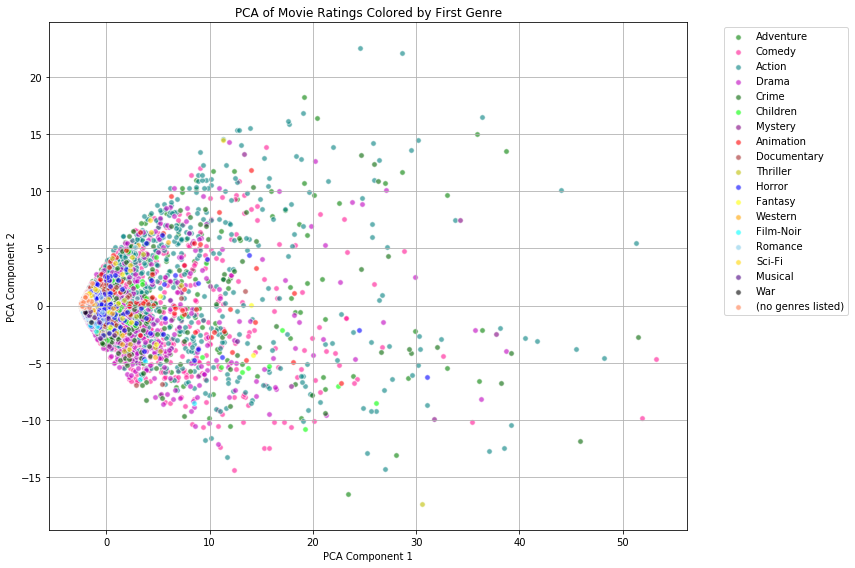

In [13]:
# Run the full process
df_A, df_B = construct_data('ratings.csv', 'movies.csv')
_, df_T = apply_pca(df_A, 2)
joined_df = join_movieDataFrames(df_T, df_B)

# Plot each genre separately for better coloring
plt.figure(figsize=(12, 8))
for genre in joined_df['firstGenre'].unique():
    genre_data = joined_df[joined_df['firstGenre'] == genre]
    color = genre_color.get(genre, 'gray')  # fallback color
    plt.scatter(genre_data[0], genre_data[1], label=genre, alpha=0.6, c=color, edgecolors='w', s=30)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Movie Ratings Colored by First Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


## Q2: Correlations on document-term matrix

In the question below, you will construct a document-term matrix, which is a 2-dimensional matrix that describes the frequency of terms (i.e., words) that occur in each document in a collection. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. The value in a given cell (i,j) counts the number of times the term j occurs in document i.
Reference: https://en.wikipedia.org/wiki/Document-term_matrix

The text file "urls.txt" contains a list of urls for the webpages to be parsed. Each line in the text file corresponds to a url. Use BeautifulSoup to fetch each webpage and parse the text as you did in HW1. Specifically,
1. For each webpage document, read the content and do the following:
    A. Retrieve all text enclosed in paragraph tags.
    B. Preprocess the text as follows:
        i. Convert to lowercase. 
        ii. Strip out punctuation using translate() with string.punctuation.
        iii. Tokenize based on whitespace separation. Note: use strip() to 
        remove all trailing whitespsace characters.
    
2. Find the set of unique words across all the documents and sort them in lexicographic order. This comprises the "vocabulary" of the corpus. Each term in the vocabulary will be a feature in the document-term matrix you will construct next. Do not add the empty string to the vocabulary. 

For the above two parts, you can use the functions/code specified below, or you can use your code from previous homeworks, or you can write your own functions. 

In [14]:
def preprocess(untokenizedWords):
    
    tokenizedWords = []
    
    for line in untokenizedWords:
        text = line.translate(str.maketrans('','',string.punctuation))
        text = text.strip().split();
        for i in range(len(text)):
            word = text[i].strip().lower();
            tokenizedWords.append(word.strip());        
    
    return tokenizedWords

In [15]:
# Function to read the urls from the file and return them as a list.

def getListOfUrls(filename):
    
    listOfUrls = [];
    
    with open(filename) as f:
        for line in f:
            url = line.split("\n")[0];
            listOfUrls.append(url);
    
    return listOfUrls

# getListOfUrls("urls.txt")

In [16]:
# Function that parses each url and returns the list of toeknized and preprocessed words, 
# that are used to create the vocabulary next.

def parse(listOfUrls):
    
    # list of tokenized (and preprocessed) words across all the documents
    listOfWordsInDocuments = []; 
    
    # parse each webpage (url)
    for url in listOfUrls:   
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        # find all the paragraph tags 
        listOfp = soup.find_all('p') 
        # list of strings to accumulate all the content inside the different paragraph tags in a url.
        listOfText = []  
        for content in listOfp:
            # get the content in each paragraph tag, as a string.
            text = content.get_text(); 
            listOfText.append(text) 
        # preprocess the content inside each url to get a list of tokenized words.
        words_doc = preprocess(listOfText) 
        # collect the tokenized words in each document.
        listOfWordsInDocuments.append(words_doc); 

    return listOfWordsInDocuments

In [17]:
# Function to create the vocabulary that is returned as a list of words (strings). 

def createVocabulary(listOfWordsInDocuments):
    
    vocabulary = set() 
    for words_doc in listOfWordsInDocuments:
        for word in words_doc:
            if(word!=''): # check if the word is not an empty string.
                vocabulary.add(word)    
    vocabulary = list(vocabulary) 
    vocabulary = sorted(vocabulary);
    
    return vocabulary

(a) Now, create the document-term data frame, where the value of the cell (i,j) in the data frame is the frequency of the term j in document i. The number of columns of the document-term matrix will correspond to the number of unique words in the vocabulary, and the number of rows will correspond to the number of documents (i.e., webpages in urls.txt). Each term is represented by a column of the document-term data frame. Each document is represented by a row of the document-term dataframe (ordered by the order of the URLs given in the file). 

Return the document-term data frame obtained with columns as the vocabulary and index as the document id of the url, which is the order in which the urls appear, that is, first url in the file will have a document id of 1, second url will have a document id of 2, and so on. 

In [24]:
# createDocumentTermDataFrame(filename) takes as input the filenames to readin data from and 
# returns the document-term data frame as specified above.
# You will use these dataframes in subsequent questions. 

# Example: 
# createDocumentTermDataFrame('urls.txt') -> df_doc_term 
import requests
def createDocumentTermDataFrame(filename):
    
    urls = getListOfUrls(filename)
    listOfWordsInDocuments = parse(urls)
    vocabulary = createVocabulary(listOfWordsInDocuments)
    
    vocab_index = {word: i for i, word in enumerate(vocabulary)}
    num_docs = len(listOfWordsInDocuments)
    num_terms = len(vocabulary)
    
    dtm = np.zeros((num_docs, num_terms), dtype=int)
    
    for doc_id, words_doc in enumerate(listOfWordsInDocuments):
        for word in words_doc:
            if word in vocab_index:
                term_idx = vocab_index[word]
                dtm[doc_id][term_idx] += 1
    
    # Create DataFrame with document IDs starting from 1
    df_doc_term = pd.DataFrame(dtm, columns=vocabulary)
    df_doc_term.index = [i+1 for i in range(num_docs)]
    df_doc_term.index.name = 'DocumentID'
    
    return df_doc_term
    

createDocumentTermDataFrame('urls.txt') # (3x1244 on 23 June 2020)


,1,1962,1974,1985,1992,1996,1997,1998,2,2005,...,wrangling,writes,wu,years,york,you,,,©,•
DocumentID,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,0,0,0,2,0,...,1,0,0,1,0,3,7,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,1,2,1,1,1,1,0,1,...,0,2,2,0,1,0,0,0,0,0


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


##### (b) Using the data frame from Q1a, consider the words: 'data', 'business', 'companies', 'mining', 'statistics', 'science'. Return a dictionary with the words as keys and the values as a list of their corresponding term frequencies for each document, (word: [list of frequencies]).

Example:

data	[105.0, 0.0, 57.0]
science	[22.0, 16.0, 31.0]


The above values are for the first three webpage urls given in the file "urls.txt". The frequencies should be listed in the order of the urls given in "urls.txt".

In [27]:
# getTermFrequencies(df_doc_term) takes as input the document-term data frame, and returns a dictionary with the above
# specified words as keys and the values as a list of their corresponding term frequencies for each document.

def getTermFrequencies(df_doc_term):
    target_words = ['data', 'business', 'companies', 'mining', 'statistics', 'science']
    term_frequencies = {}

    for word in target_words:
        if word in df_doc_term.columns:
            # Convert int to float for consistency
            term_frequencies[word] = [float(val) for val in df_doc_term[word].tolist()]
        else:
            # Word not found in vocabulary, so fill with 0.0s
            term_frequencies[word] = [0.0] * len(df_doc_term)

    return term_frequencies
  
# Example:
df_doc_term = createDocumentTermDataFrame('urls.txt')
getTermFrequencies(df_doc_term)
# Order may vary
# {'business': [17.0, 0.0, 1.0],
#  'companies': [1.0, 1.0, 2.0],
#  'data': [105.0, 0.0, 57.0],
#  'mining': [2.0, 0.0, 2.0],
#  'science': [22.0, 16.0, 31.0],
#  'statistics': [5.0, 0.0, 15.0]}

{'data': [105.0, 0.0, 56.0],
 'business': [17.0, 0.0, 0.0],
 'companies': [1.0, 0.0, 0.0],
 'mining': [2.0, 0.0, 1.0],
 'statistics': [5.0, 0.0, 11.0],
 'science': [22.0, 2.0, 30.0]}

In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(c) Calculate the correlation between the two documents here.

In [29]:
# findCorrelation(filename, doc_1, doc_2) takes as input the file to read in data from and the document ids, 
# doc_1 and doc_2 of two documents, and returns the correlation between the documents with the document vector
# as the frequencies of the words in the vocabulary.


def findCorrelation(filename, doc_1, doc_2):
    # Get the document-term DataFrame
    df_doc_term = createDocumentTermDataFrame(filename)

    # Ensure valid document IDs
    if doc_1 not in df_doc_term.index or doc_2 not in df_doc_term.index:
        raise ValueError("Invalid document IDs provided.")

    # Extract the frequency vectors for the two documents
    vec1 = df_doc_term.loc[doc_1]
    vec2 = df_doc_term.loc[doc_2]

    # Compute Pearson correlation
    correlation = vec1.corr(vec2)

    return correlation
    
findCorrelation('urls.txt',1,2) # -> 0.6119...

0.17455558041510316

In [2]:
    ###
    ### AUTOGRADER TEST - DO NOT REMOVE
    ###


In [3]:
    ###
    ### AUTOGRADER TEST - DO NOT REMOVE
    ###


In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(d) For every word, find its average frequency across all documents. Then create a new document-term data frame with the same dimensions as above. For the value of cell (i,j), set the value to +1 if the frequency of word j in document i is greater than the average frequency of word j, otherwise set it to -1. 

Return the transformed document-term data frame with the same columns and index as for the document-term data frame in Q2 a.

In [30]:
# transformDocumentTermDataFrame(df_doc_term) takes as input the document term dataFrame df_doc_term obtained in Q2 a,
# performs the above described transformation, and returns the transformed dataframe.


def transformDocumentTermDataFrame(df_doc_term):
    
    # Compute mean frequency for each column (word)
    avg_freq = df_doc_term.mean(axis=0)
    
    # Compare each cell to the average and assign +1 or -1
    transformed_df = df_doc_term.apply(lambda col: col.apply(lambda val: 1 if val > avg_freq[col.name] else -1))
    
    # Return transformed DataFrame
    return transformed_df

df_doc_term = createDocumentTermDataFrame('urls.txt')
transformDocumentTermDataFrame(df_doc_term) # 3x1244 on 23 June 2020, data should be transformed as described above.

,1,1962,1974,1985,1992,1996,1997,1998,2,2005,...,wrangling,writes,wu,years,york,you,,,©,•
DocumentID,,,,,,,,,,,,,,,,,,,,,
1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,-1,-1,1,-1,1,1,1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
3,-1,1,1,1,1,1,1,1,-1,1,...,-1,1,1,-1,1,-1,-1,-1,-1,-1


In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [31]:
# findCorrelation_T(filename, doc_1, doc_2) takes as input the file to read in data from and the document ids, 
# doc_1 and doc_2 of two documents, and gets the transformed dataframe using the above function, and
# returns the correlation between the documents with the document vector as the transformed values of the words in 
# the vocabulary.


def findCorrelation_T(filename, doc_1, doc_2):
    
    # Step 1: Generate the original document-term dataframe
    df_doc_term = createDocumentTermDataFrame(filename)
    
    # Step 2: Transform it using the rules from part (d)
    df_transformed = transformDocumentTermDataFrame(df_doc_term)
    
    # Step 3: Extract the two document vectors (using 1-based indexing)
    vec1 = df_transformed.loc[doc_1]
    vec2 = df_transformed.loc[doc_2]
    
    # Step 4: Compute and return Pearson correlation
    correlation = vec1.corr(vec2)
    return correlation

findCorrelation_T('urls.txt', 1, 2) # -> -0.453... as of 23 June 2020

-0.27649397907142786

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [27]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(f) Now, find the correlation between different documents and plot the correlation matrix as a heatmap. Note that you need to use the original document term dataframe obtained in Q2 a, and not the transformed one. 

Note that this question will be graded manually. 

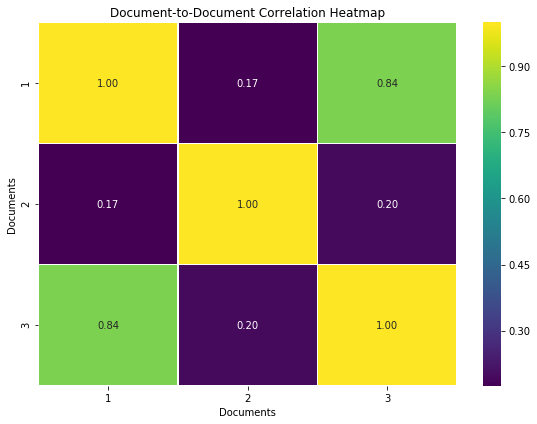

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotDocumentCorrelationHeatmap(filename):
    # Step 1: Create the original document-term matrix
    df_doc_term = createDocumentTermDataFrame(filename)
    
    # Step 2: Compute pairwise correlation between documents (row-wise correlation)
    doc_correlation = df_doc_term.T.corr()  # Transpose to compute correlation between rows
    
    # Step 3: Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(doc_correlation, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
    plt.title("Document-to-Document Correlation Heatmap")
    plt.xlabel("Documents")
    plt.ylabel("Documents")
    plt.tight_layout()
    plt.show()

plotDocumentCorrelationHeatmap('urls.txt')
